#### Task 1.

The torque output of a DC motor is controlled by changing the input voltage. Since your objective is to use the plant model in a feedback loop, you will need to be able to change the voltage using an external signal. The Controlled Voltage Source (__Electrical > Electrical Sources__) uses a physical signal input to set the block's voltage.

Add a Controlled Voltage Source and a PS Constant block to your model.
 
Set the __Constant Value__ of the PS Constant to 36 V and connect it to the Controlled Voltage Source.

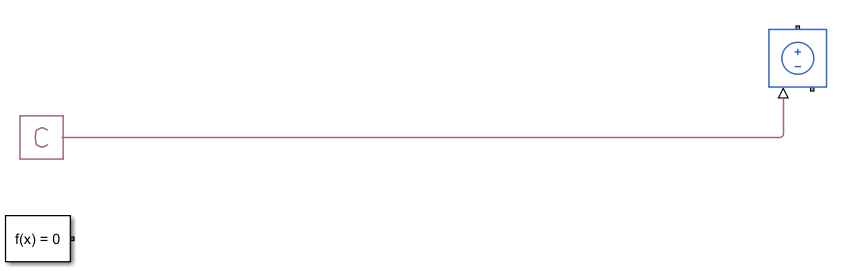

#### Task 2.

The DC Motor Model consists of a voltage source, resistor, and inductor in series with the back electromotive force.

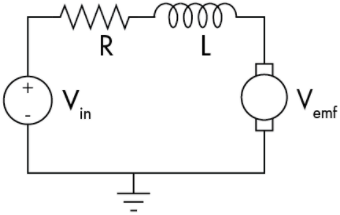

Add a Resistor, Inductor, and Electrical Reference block to the model.
 
Set the __Resistance__ to 50 Ohm and the __Inductance__ to 1.2e-4 H.

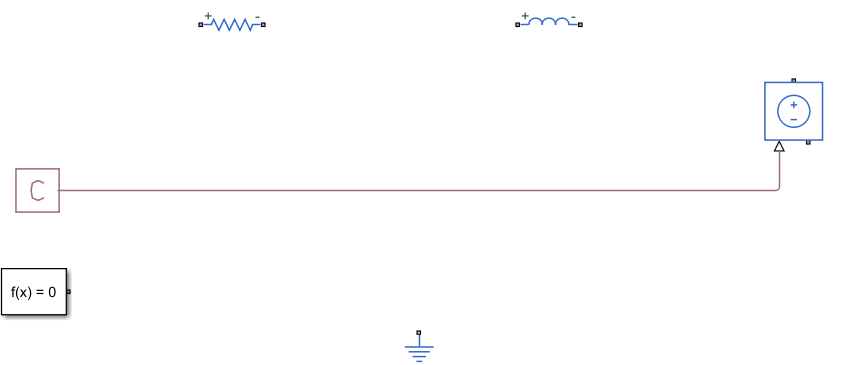

#### Task 3.

Add a Rotational Electromechanical Converter block to your model. Set __Constant of Proportionality (K)__ to 10 V/(rad/s). Make the connections to complete the electrical circuit portion of the model.

Don't forget to connect the Solver Configuration block to your network.

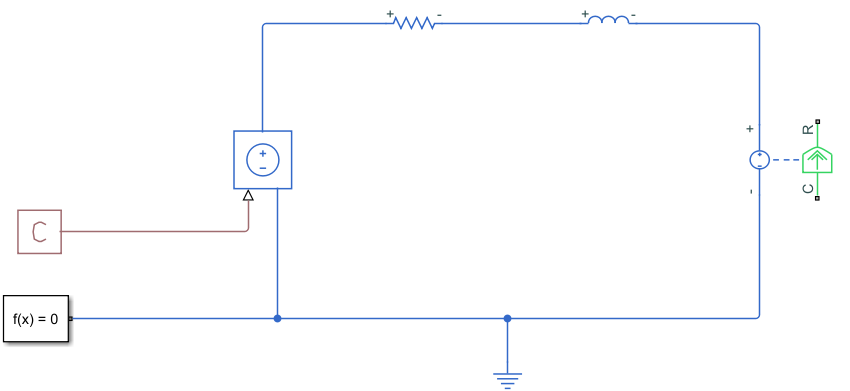

#### Task 4.

The motor is connected to the valve through a set of gears. The rotating valve components can be modeled as a lumped inertia.

1. Add a Gear Box and an Inertia block to the model. <br>
2. Set the __Gear Ratio__ to 5 and the __Inertia__ to 0.1 kg*m^2. <br>
3. Connect the Rotational Electromechanical Converter and the Inertia to the Gear Box. <br>
4. Add a Mechanical Rotational Reference to ground the C port of the converter block.

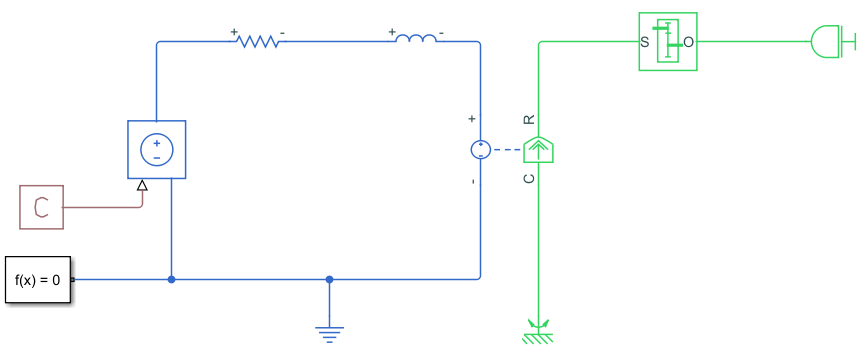

#### Task 5.

The valve has stops to limit its rotation between 0 degrees (fully closed) and 360 degrees (fully opened). The Rotational Hard Stop (__Mechanical > Rotational Elements__) allows you to model these physical boundaries.

1. Add a Rotational Hard Stop to the model.
2. Connect it to the Inertia and to a Mechanical Rotational Reference.
3. Set the __Upper Bound__ to 360 deg and the __Lower Bound__ to 0 deg.

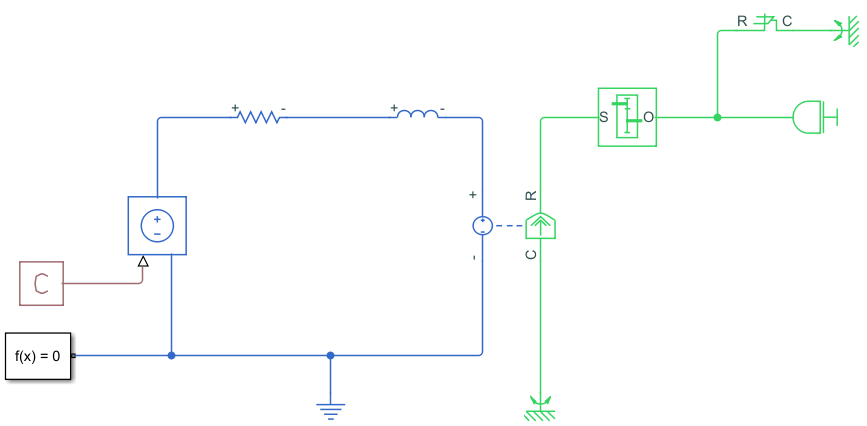

#### Task 6.

Your objective is to control the flow rate through the valve. You will be given the relationship between valve position (in degrees) and flow rate. Therefore, you need to measure the valve position.

1. Add an Ideal Rotational Motion Sensor and a PS-Simulink Converter to the model.
2. Connect the sensor and PS-Simulink Converter to the rest of the model in order to measure the rotation of the valve.
3. Set the __Output Signal Unit__ of the PS-Simulink converter to deg.

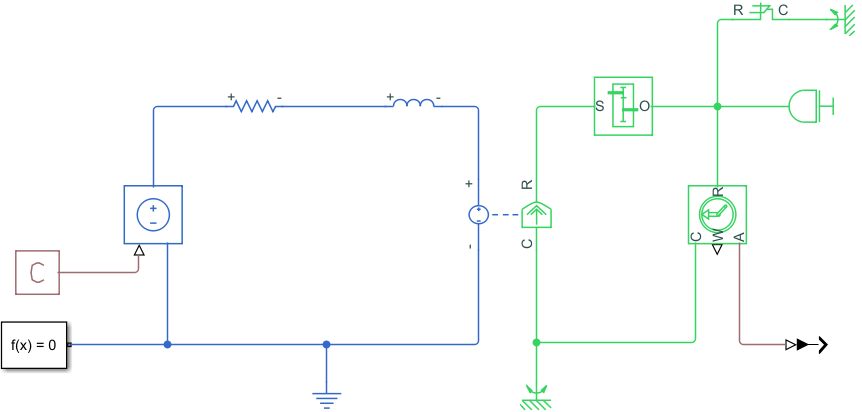

#### Task 7.

The datasheet describes a linear relationship between valve position and flow rate, as given in the table below.

__Valve Position__ &emsp;&emsp;__Flow Rate__ <br>
&emsp;&emsp;0 deg &emsp;&emsp;&emsp;&emsp;0 liters/min <br>
&emsp;&emsp;360 deg &emsp;&emsp;&emsp;50 liters/min

Simulink contains a 1-D Lookup Table (__Simulink > Lookup Tables__) block. This block allows you to specify an input-output relationship using a table of values, and interpolates between the specified values.

1. Add a 1-D Lookup Table to your model and connect it to the angular rotation measurement.
2. Set the __Value__ of __Table Data__ to [0 50].
3. Set the __Value__ of __Breakpoints 1__ to [0 360].
 
Add a Scope and connect it to the output of the 1-D Lookup Table. When you run the model, you will see the flow rate increase at a constant rate until the valve hits the hard stop.

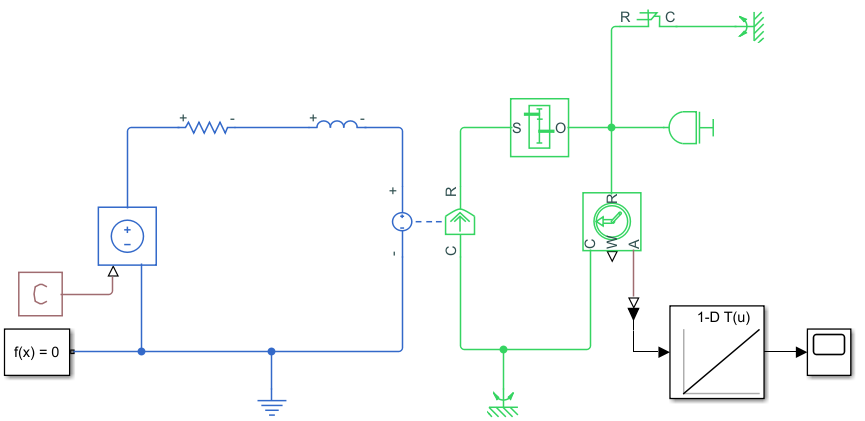

#### Task 8.

You have created a plant model with motor voltage as the input and flow rate as the output. Now you will add a feedback control loop.

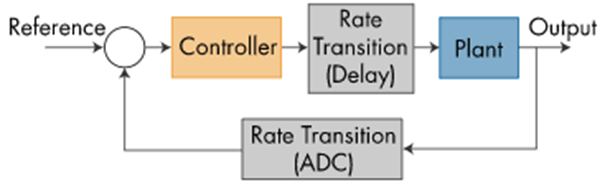

Delete the PS Constant block. Add the following blocks: <br>
1. Simulink-PS Converter <br>
2. Constant <br>
3. Discrete PID Controller <br>
4. Sum <br>
5. Unit Delay

Arrange them to create a feedback control loop, with the Constant block providing the reference signal.
 
Use the Unit Delay to break the algebraic loop.

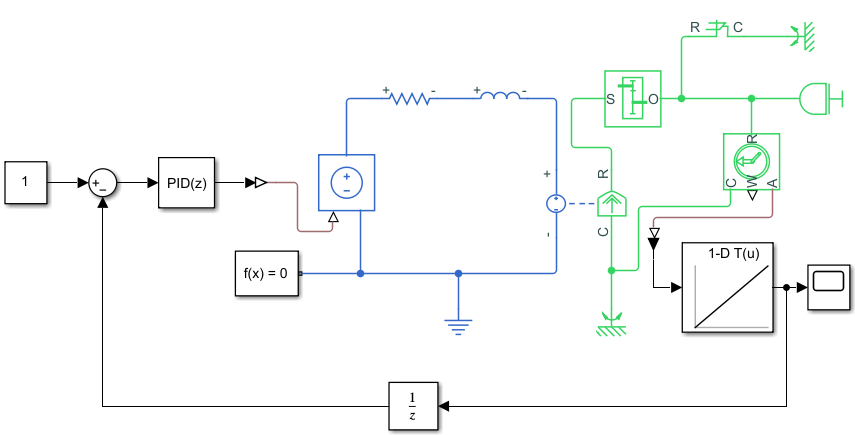

#### Task 9.

You would like to achieve a flow rate of 5 liters per minute.

Set the __Constant Value__ of the Constant block to 5.
 
On the Discrete PID Controller, set the __Controller__ to PI and the __Sample Time__ to 0.1. 

Change the following Controller parameters: <br>
__Proportional (P)__: 15 <br>
__Integral (I)__: 10
 
Connect the scope to the output of the 1-D Lookup Table to view the controlled flow rate.

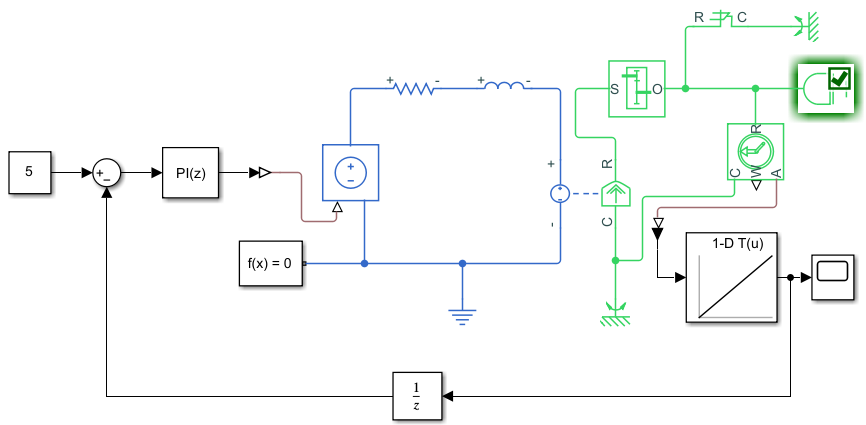